# Importing Required Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
import xgboost as xgb
from sklearn import model_selection,metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier
%matplotlib inline
sns.set_style('whitegrid') 
%config InlineBackend.figure_format = 'retina'
from sklearn.metrics import classification_report
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Importing The Dataset

**Dataset Information**

*   Pregnancies: Number of times pregnant
*   Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
*   Blood Pressure:Diastolic blood pressure (mm Hg)
*   Skin Thickness: Triceps skin fold thickness (mm)
*   Insulin: 2-Hour Serum Insulin (mu U/ml)
*   BMI: Body Mass Index (weight in kg/ height in m2)
*   Diabetes Pedigree Function: It provides information about diabetes history in relatives and genetic relationship of those relatives with patients. Higher Pedigree Function means patient is more likely to have diabetes.
*   Age:Age (years)
*   Outcome: Class Variable (0 or 1) where ‘0’ denotes patient not having diabetes and ‘1’ denotes patient having diabetes.





In [ ]:
df = pd.read_csv("/content/diabetes.csv")

# Statistical Overview of dataset

In [ ]:
df.sample(5)

Pregnancies  Glucose  ...  Age  Outcome
17             7      107  ...   31        1
685            2      129  ...   25        0
453            2      119  ...   72        0
336            0      117  ...   44        0
129            0      105  ...   62        1

[5 rows x 9 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.shape

(768, 9)

Checking null values

In [ ]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.describe().T

count        mean  ...        75%     max
Pregnancies               768.0    3.845052  ...    6.00000   17.00
Glucose                   768.0  120.894531  ...  140.25000  199.00
BloodPressure             768.0   69.105469  ...   80.00000  122.00
SkinThickness             768.0   20.536458  ...   32.00000   99.00
Insulin                   768.0   79.799479  ...  127.25000  846.00
BMI                       768.0   31.992578  ...   36.60000   67.10
DiabetesPedigreeFunction  768.0    0.471876  ...    0.62625    2.42
Age                       768.0   33.240885  ...   41.00000   81.00
Outcome                   768.0    0.348958  ...    1.00000    1.00

[9 rows x 8 columns]

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
col = [   'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age' ]
for i in col:
    df[i].replace(0, np.nan,inplace=True)

In [ ]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

# Data Visualization
**Histogram**
A histogram is a bar graph representation of a grouped data distribution. In other words, it is the transfer of data consisting of repetitive numbers to the table first, and to the chart by using the table, in other words, the graph of the data groups is displayed in rectangular columns.

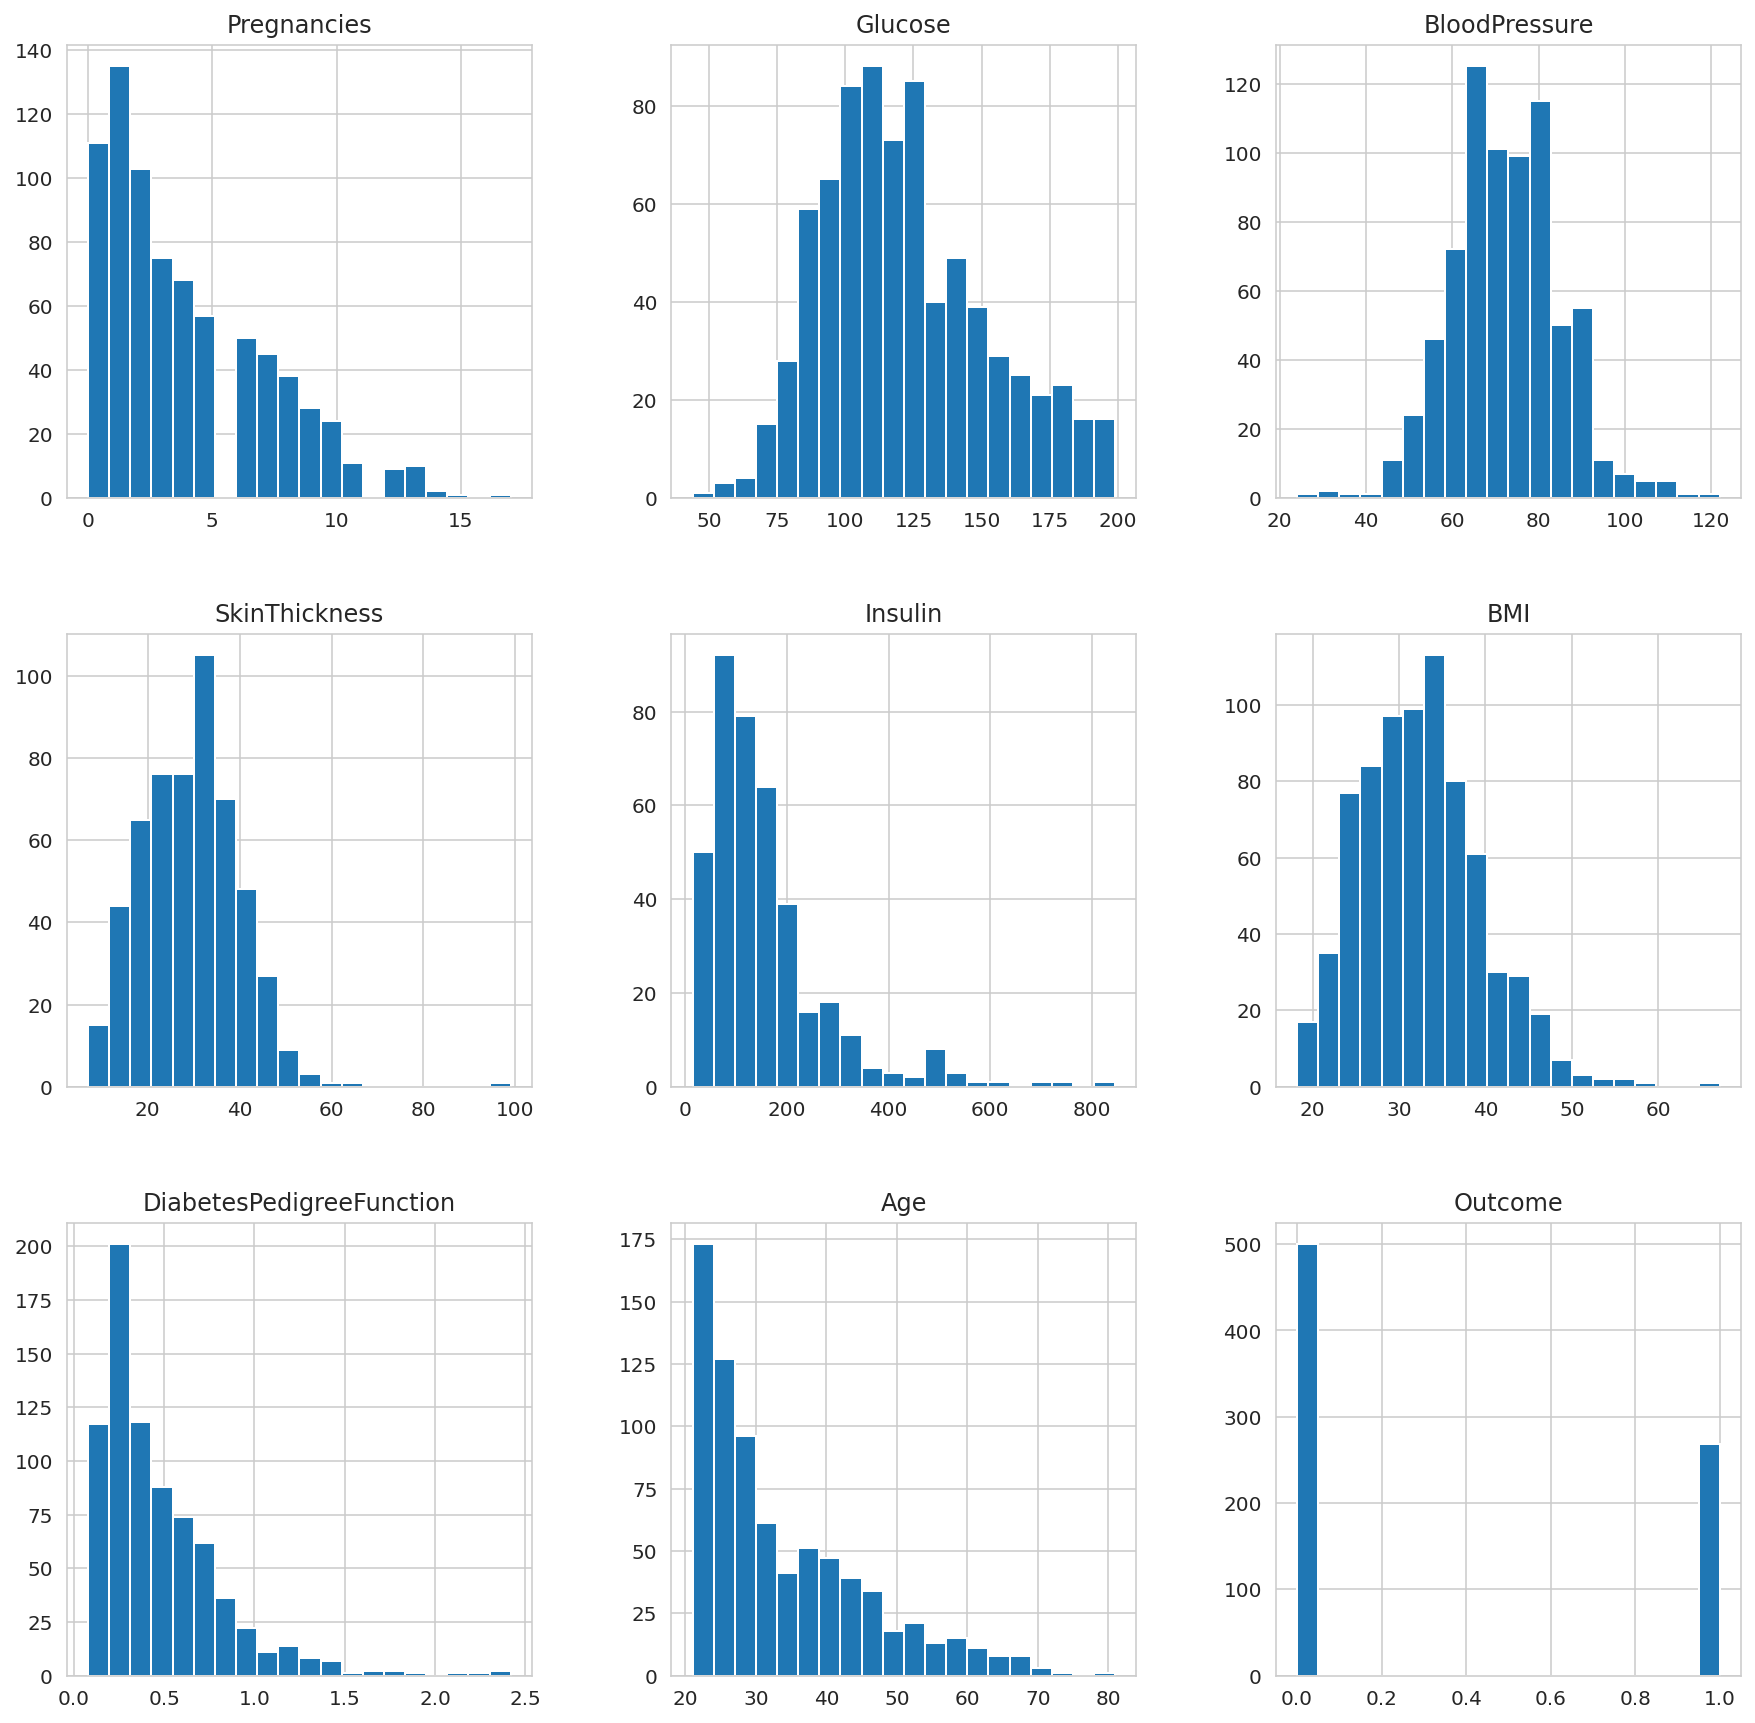

In [ ]:
df.hist(bins = 20,figsize= (15,15) );

This is a high-level interface for PairGrid that is intended to make it easy to draw a few common styles. You should use PairGrid directly if you need more flexibility

<Figure size 1440x1440 with 0 Axes>

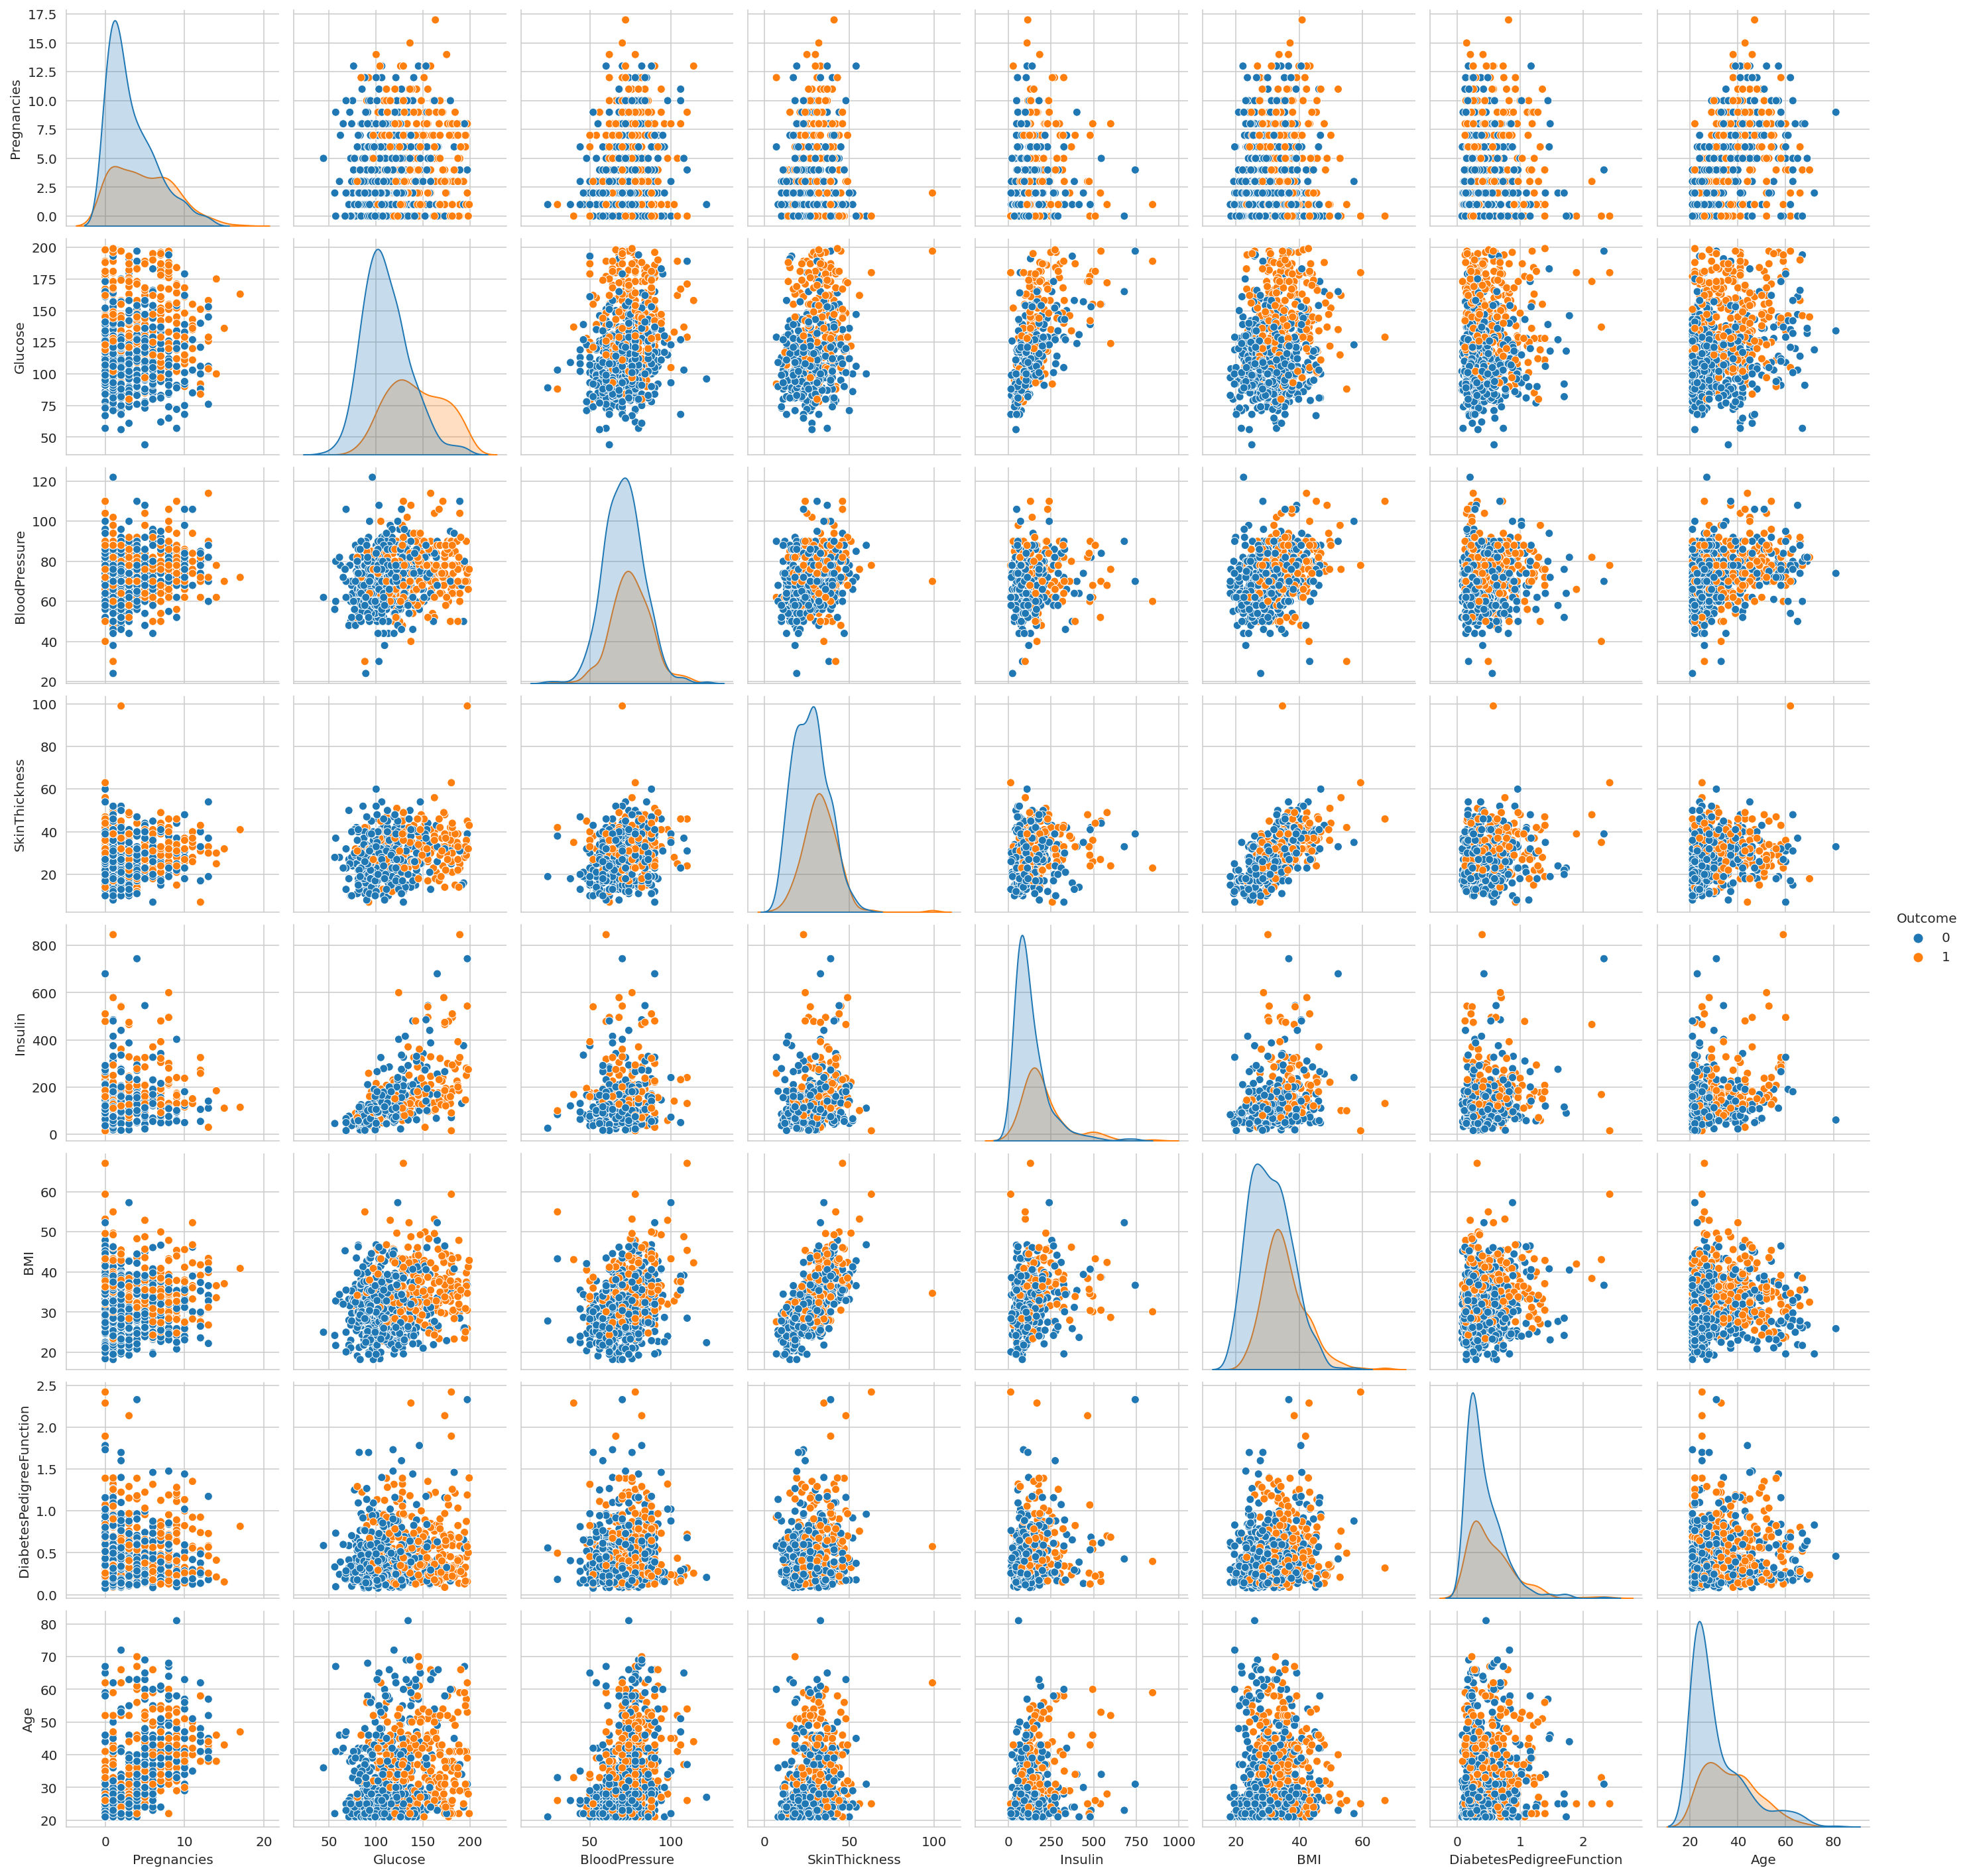

In [ ]:
plt.figure(figsize=(20,20))
sns.pairplot(df,hue = "Outcome")

Correlation is a term that is a measure of the strength of a linear relationship between two quantitative variables.

Correlation matrix of variables with each other.

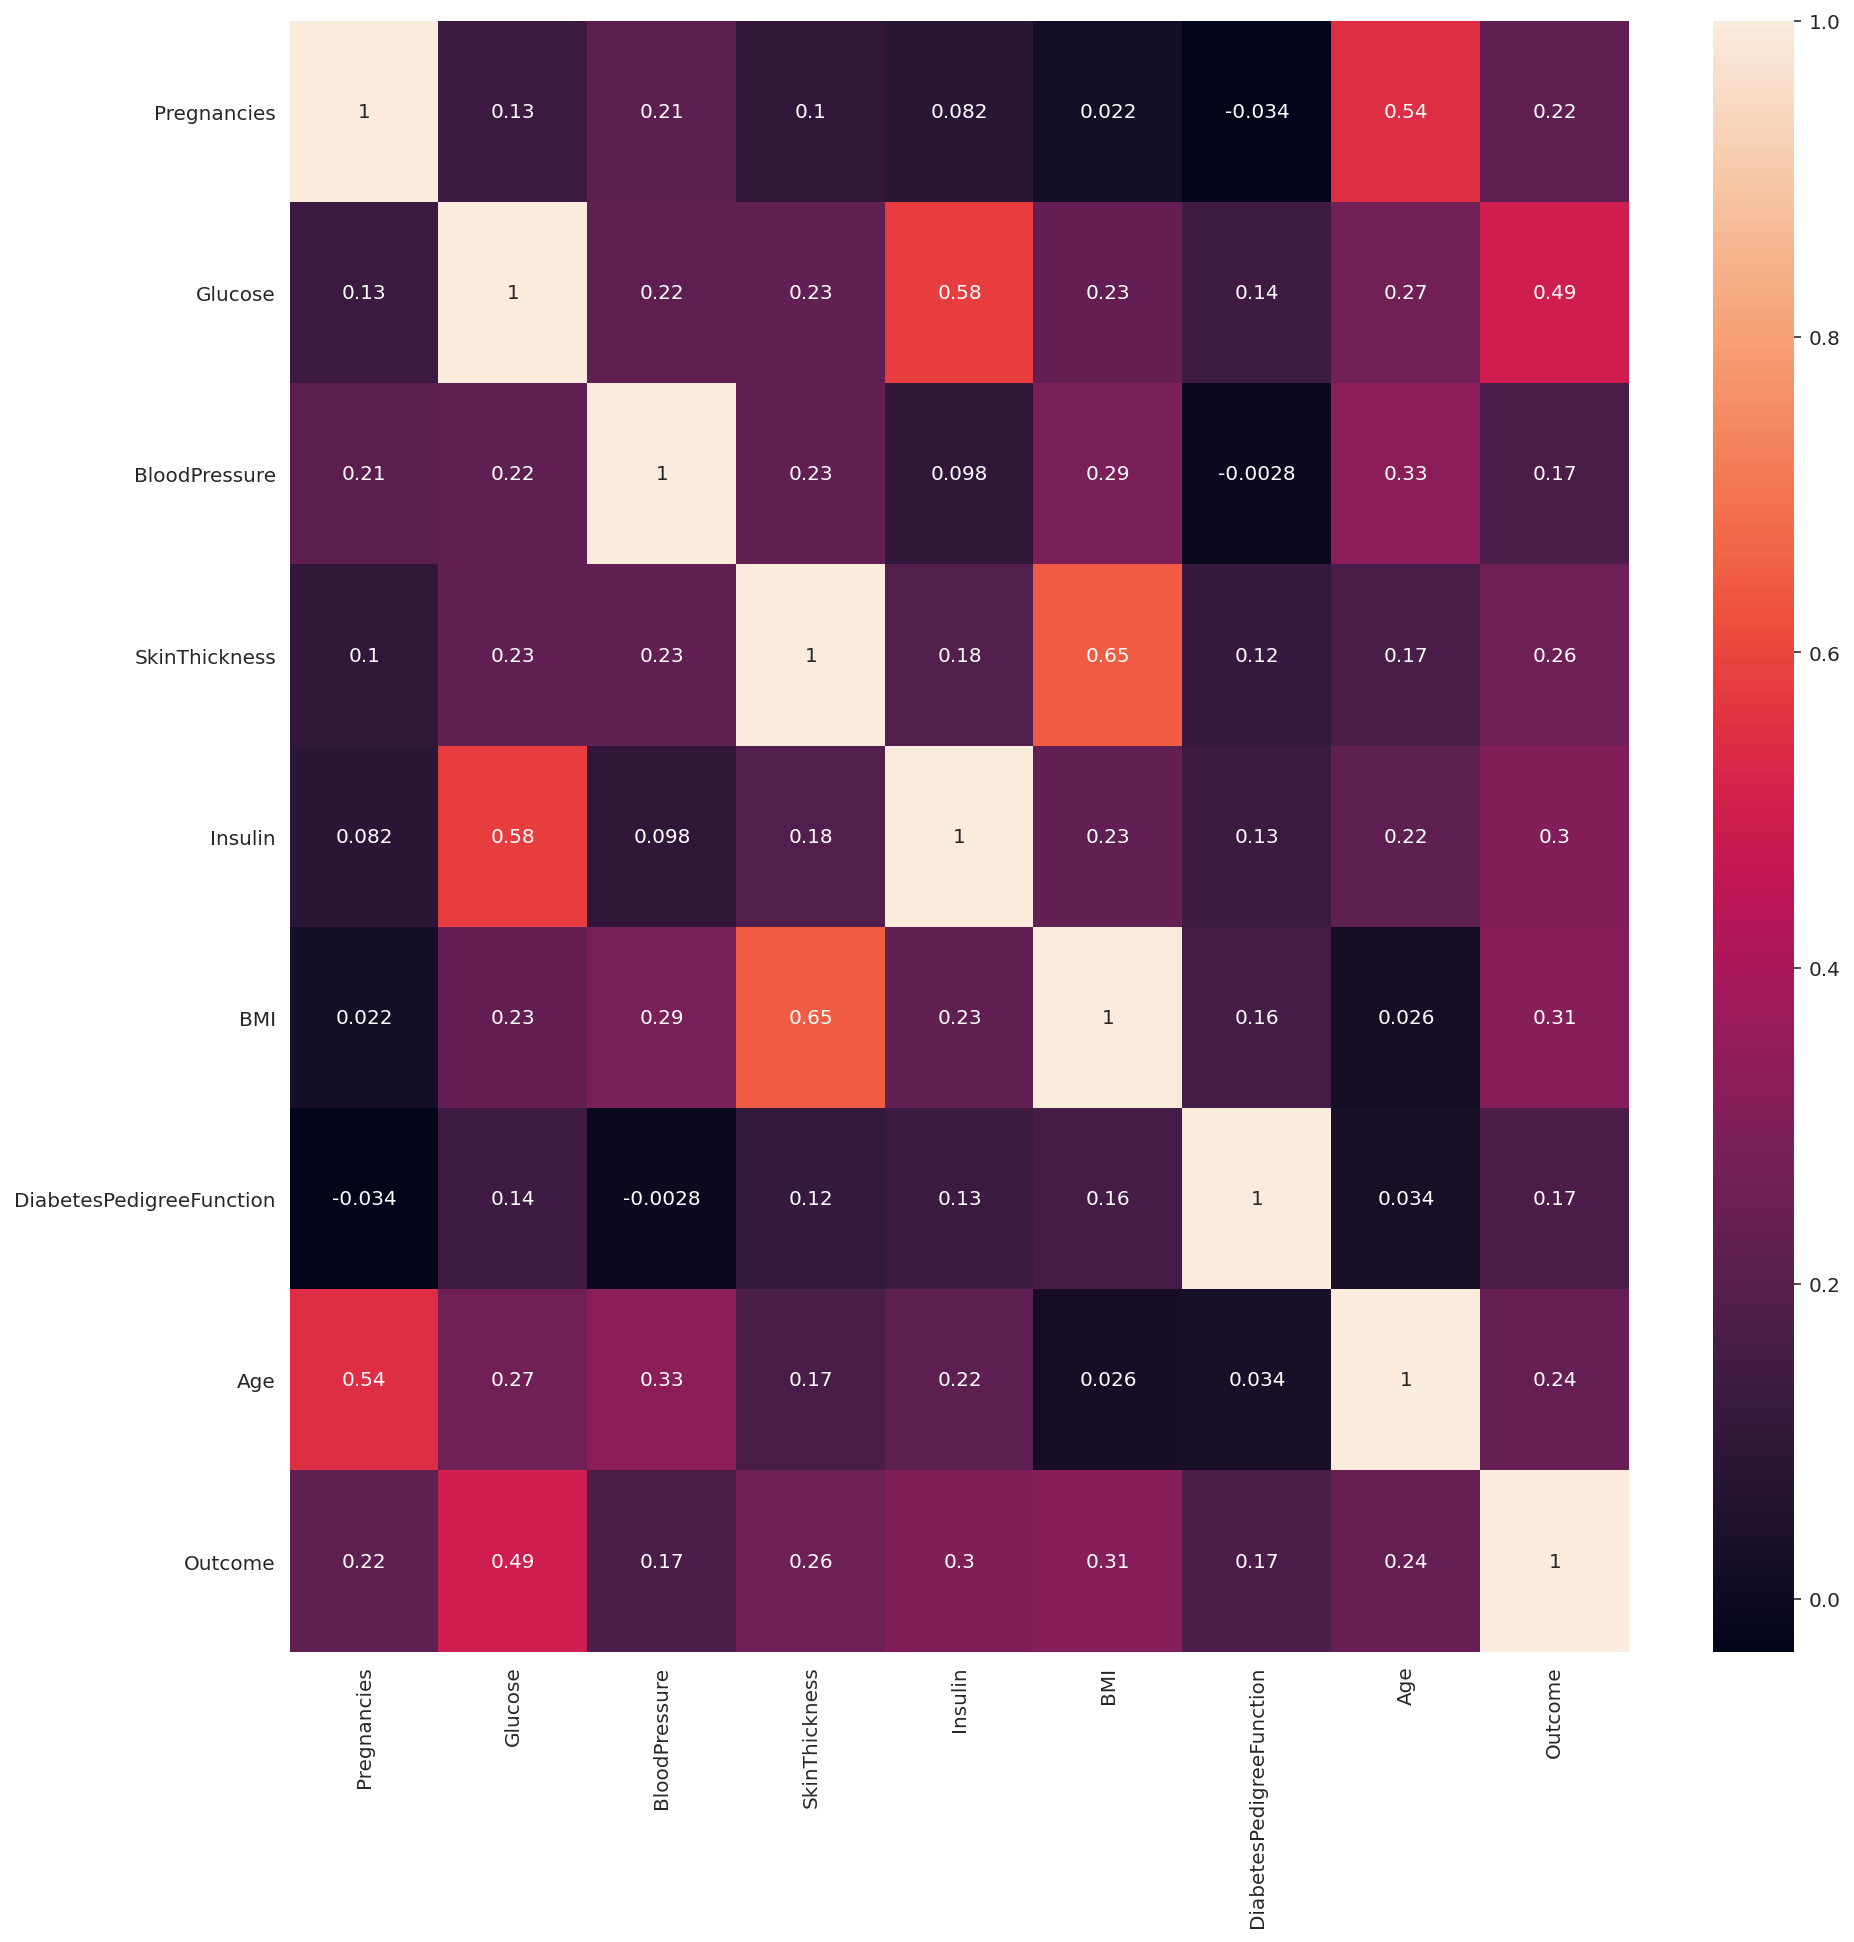

In [ ]:
plt.figure(figsize=(15,15))
corr = df.corr()
sns.heatmap(corr,annot=True)

A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. A Pie Chart is a type of graph that displays data in a circular graph. The pieces of the graph are proportional to the fraction of the whole in each category.

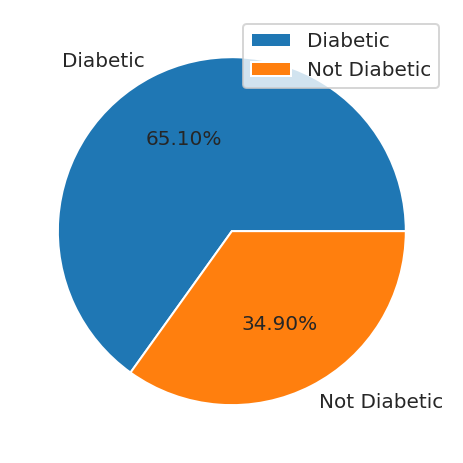

In [ ]:
labels= 'Diabetic','Not Diabetic'
plt.pie(df['Outcome'].value_counts(),labels=labels,autopct='%0.02f%%')
plt.legend()
plt.show()

# Preprocessing the Dataset

Creating a function to calculate median

In [ ]:
def det_median(col_name):
    select_not_null=df[df[col_name].notnull()]
    result=select_not_null[[col_name,'Outcome']].groupby(['Outcome'])[[col_name]].median().reset_index()
    return result

In [ ]:
det_median('BMI')

Outcome   BMI
0        0  30.1
1        1  34.3

In [ ]:
det_median('Insulin') 

Outcome  Insulin
0        0    102.5
1        1    169.5

In [ ]:
det_median('Pregnancies')

Outcome  Pregnancies
0        0            2
1        1            4

In [ ]:
det_median('BloodPressure')

Outcome  BloodPressure
0        0           70.0
1        1           74.5

In [ ]:
det_median('SkinThickness')

Outcome  SkinThickness
0        0           27.0
1        1           32.0

In [ ]:
det_median('DiabetesPedigreeFunction')

Outcome  DiabetesPedigreeFunction
0        0                     0.336
1        1                     0.449

In [ ]:
det_median('Glucose')

Outcome  Glucose
0        0    107.0
1        1    140.0

Here null values is replaced by median . here we created seperate median i.e for outcome 0 and 1

In [ ]:
df.loc[(df['Outcome']==0) & (df['BMI'].isnull()),'BMI'] =30.1
df.loc[(df['Outcome']==1) & (df['BMI'].isnull()),'BMI'] =34.3
df.loc[(df['Outcome']==0) & (df['Glucose'].isnull()),'Glucose'] =107.0
df.loc[(df['Outcome']==1) & (df['Glucose'].isnull()),'Glucose'] =140.0
df.loc[(df['Outcome']==0) & (df['BloodPressure'].isnull()),'BloodPressure'] =70.0
df.loc[(df['Outcome']==1) & (df['BloodPressure'].isnull()),'BloodPressure'] =74.5
# df.loc[(df['Outcome']==0) & (df['Pregnancies'].isnull()),'Pregnancies'] =3 
# df.loc[(df['Outcome']==1) & (df['Pregnancies'].isnull()),'Pregnancies'] =5
df.loc[(df['Outcome']==0) & (df['Insulin'].isnull()),'Insulin'] =102.5
df.loc[(df['Outcome']==1) & (df['Insulin'].isnull()),'Insulin'] =169.5
df.loc[(df['Outcome']==0) & (df['SkinThickness'].isnull()),'SkinThickness'] =27.0
df.loc[(df['Outcome']==1) & (df['SkinThickness'].isnull()),'SkinThickness'] =32.0


In [ ]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Checking the outliers and removing it with the median.

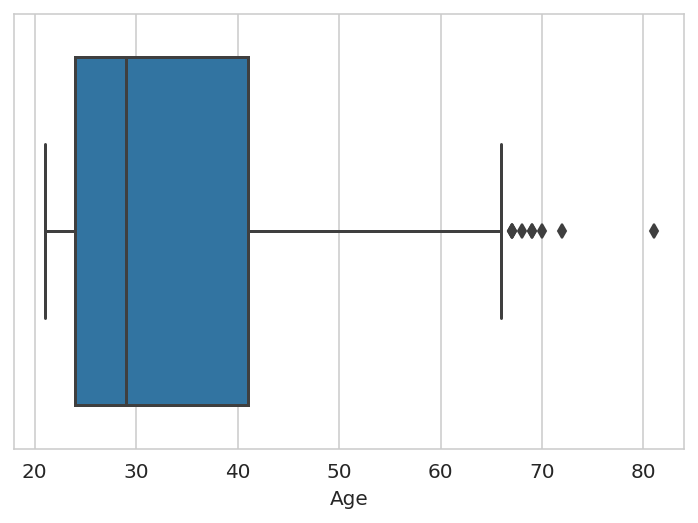

In [ ]:
sns.boxplot(df.Age)

In [ ]:
det_median('Age')

Outcome  Age
0        0   27
1        1   36

In [ ]:
df.loc[(df['Outcome']==0) & (df['Age']>63),'Age'] =27
df.loc[(df['Outcome']==1) & (df['Age']>63),'Age'] =36

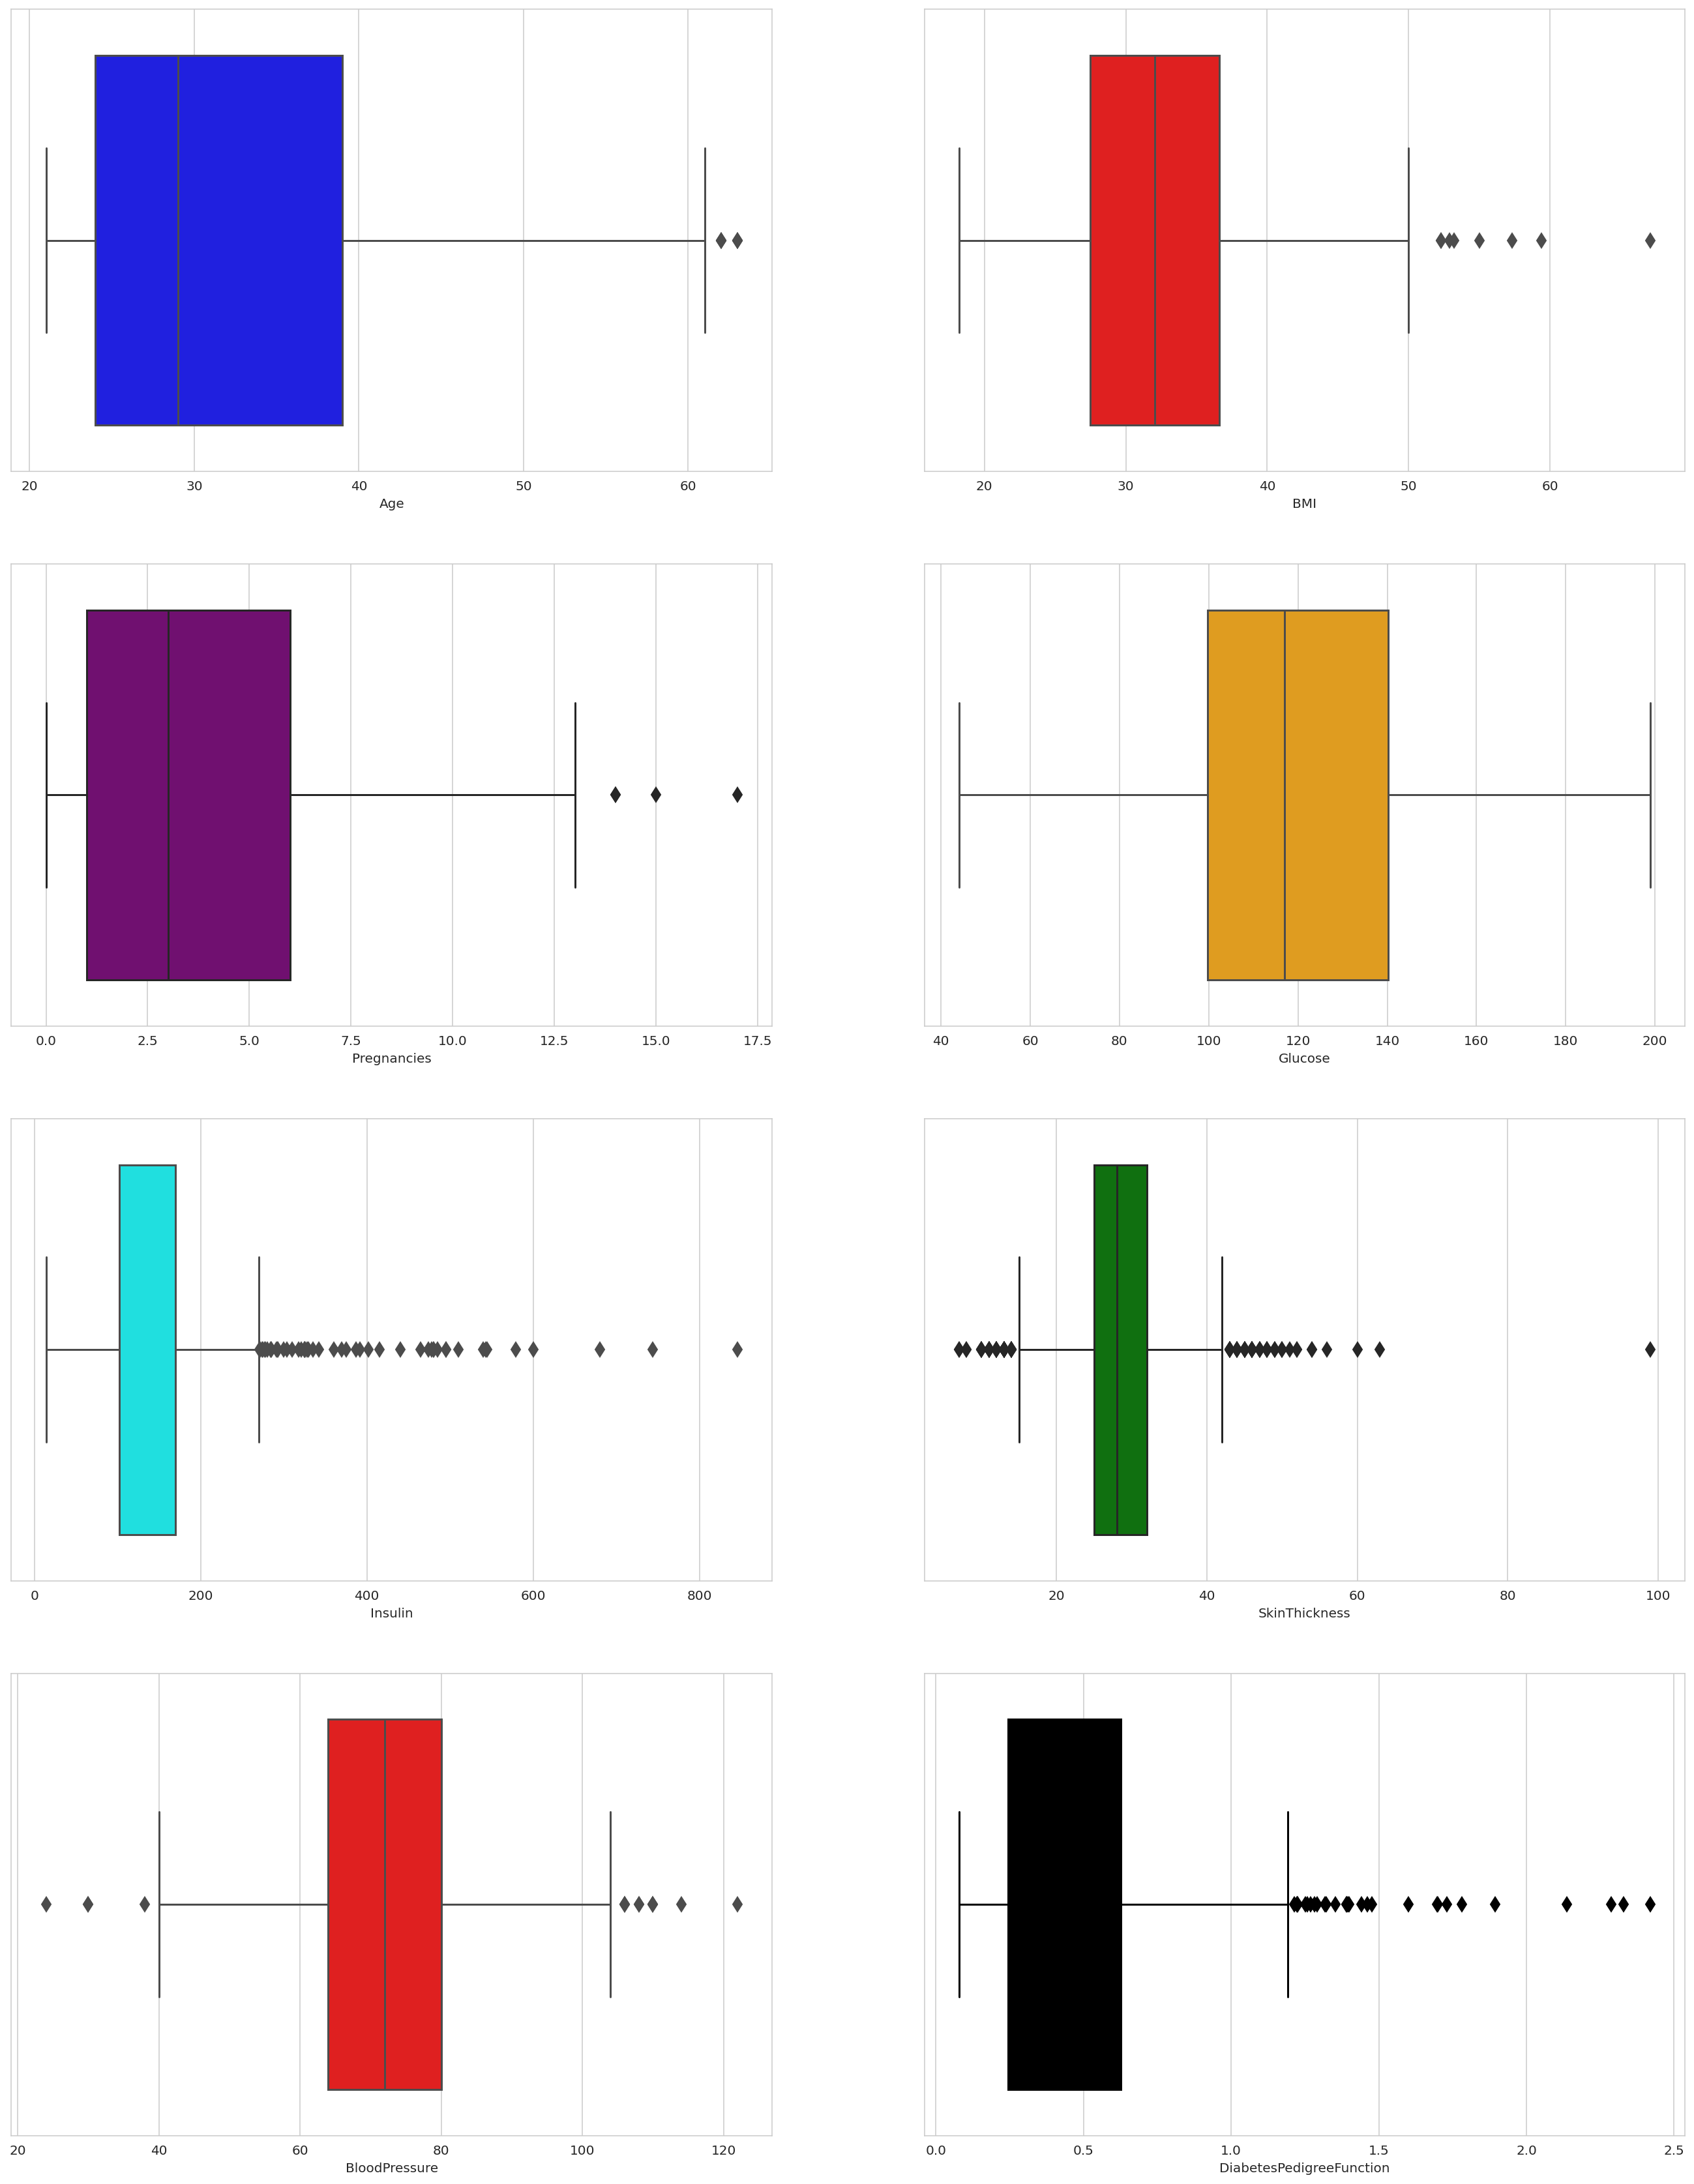

In [ ]:
fig,axes=plt.subplots(4,2,figsize=(23,30))
sns.boxplot(ax=axes[0,0],x='Age' ,data=df,color='blue',fliersize=8)
sns.boxplot(ax=axes[0,1],x='BMI',data=df,color='red',fliersize=8)
sns.boxplot(ax=axes[1,0],x='Pregnancies',data=df,color='purple',fliersize=8)
sns.boxplot(ax=axes[1,1],x='Glucose',data=df,color='orange',fliersize=8)
sns.boxplot(ax=axes[2,0],x='Insulin',data=df,color='cyan',fliersize=8)
sns.boxplot(ax=axes[2,1],x='SkinThickness',data=df,color='green',fliersize=8)
sns.boxplot(ax=axes[3,0],x='BloodPressure',data=df,color='red',fliersize=8)
sns.boxplot(ax=axes[3,1],x='DiabetesPedigreeFunction',data=df,color='black',fliersize=8)

In [ ]:
df.loc[(df['Outcome']==0) & (df['BMI'] >52),'BMI'] =30.1
df.loc[(df['Outcome']==1) & (df['BMI']>52),'BMI'] =30.1
 
df.loc[(df['Outcome']==0) & (df['BloodPressure']>105),'BloodPressure'] =70.0
df.loc[(df['Outcome']==1) & (df['BloodPressure']>105),'BloodPressure'] =74.5
df.loc[(df['Outcome']==0) & (df['Pregnancies']>12),'Pregnancies'] =2 
df.loc[(df['Outcome']==1) & (df['Pregnancies']>12),'Pregnancies'] =4
df.loc[(df['Outcome']==0) & (df['Insulin']>250),'Insulin'] =102.5
df.loc[(df['Outcome']==1) & (df['Insulin']>250),'Insulin'] =169.5
df.loc[(df['Outcome']==0) & (df['SkinThickness']>40),'SkinThickness'] =27.0
df.loc[(df['Outcome']==1) & (df['SkinThickness']>40),'SkinThickness'] =32.0
df.loc[(df['Outcome']==0) & (df['DiabetesPedigreeFunction']>1),'DiabetesPedigreeFunction'] =0.336
df.loc[(df['Outcome']==1) & (df['DiabetesPedigreeFunction']>1),'DiabetesPedigreeFunction'] =0.449


In [ ]:
df.loc[(df['Outcome']==0) & (df['SkinThickness']<20),'SkinThickness'] =27.0
df.loc[(df['Outcome']==1) & (df['SkinThickness']<20),'SkinThickness'] =32.0
df.loc[(df['Outcome']==0) & (df['BloodPressure']<40),'BloodPressure'] =70.0
df.loc[(df['Outcome']==1) & (df['BloodPressure']<40),'BloodPressure'] =74.5

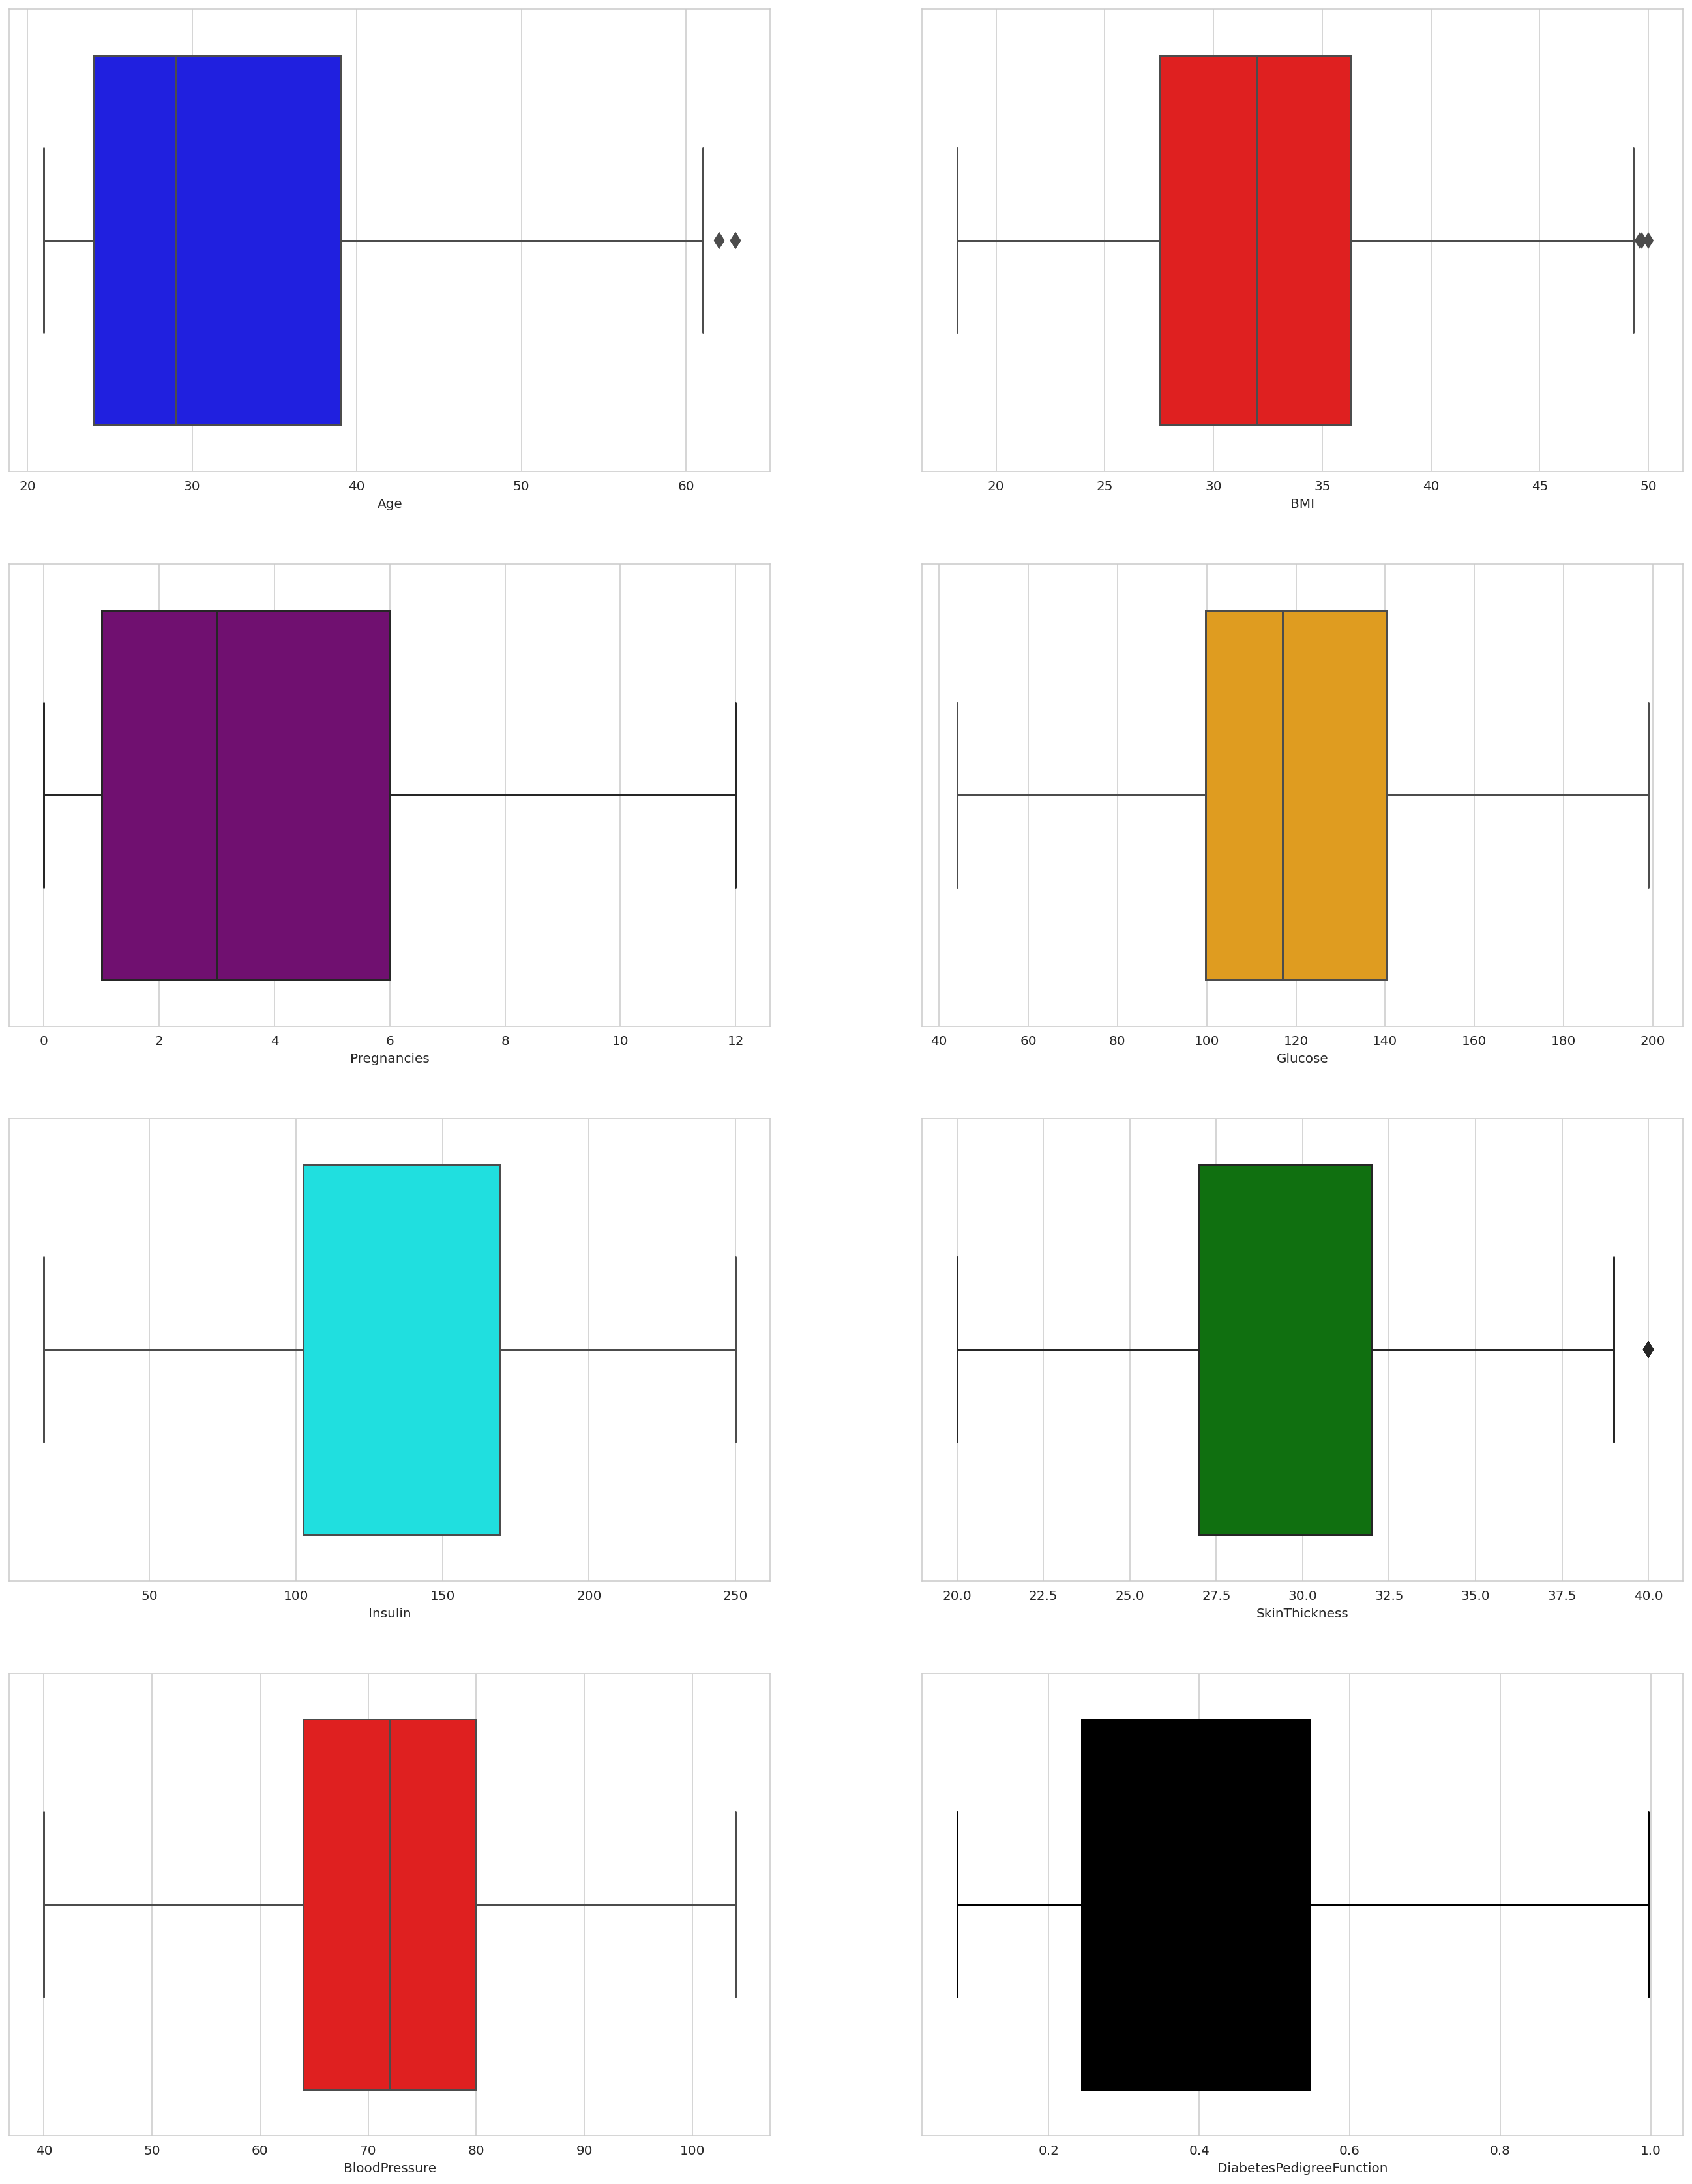

In [ ]:
fig,axes=plt.subplots(4,2,figsize=(23,30))
sns.boxplot(ax=axes[0,0],x='Age' ,data=df,color='blue',fliersize=8)
sns.boxplot(ax=axes[0,1],x='BMI',data=df,color='red',fliersize=8)
sns.boxplot(ax=axes[1,0],x='Pregnancies',data=df,color='purple',fliersize=8)
sns.boxplot(ax=axes[1,1],x='Glucose',data=df,color='orange',fliersize=8)
sns.boxplot(ax=axes[2,0],x='Insulin',data=df,color='cyan',fliersize=8)
sns.boxplot(ax=axes[2,1],x='SkinThickness',data=df,color='green',fliersize=8)
sns.boxplot(ax=axes[3,0],x='BloodPressure',data=df,color='red',fliersize=8)
sns.boxplot(ax=axes[3,1],x='DiabetesPedigreeFunction',data=df,color='black',fliersize=8)

# Splitting the Dataset for testing and training

In [ ]:
X=df.drop(['Outcome'],axis=1)
y=df['Outcome']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_predict_logreg = logreg.predict(X_test)
print(classification_report(y_test,y_predict_logreg))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       107
           1       0.80      0.87      0.84        47

    accuracy                           0.90       154
   macro avg       0.87      0.89      0.88       154
weighted avg       0.90      0.90      0.90       154



In [ ]:
rforest = RandomForestRegressor()
rforest.fit(X_train,y_train)
rforest.score(X_test,y_test)

0.7817695366872142

In [ ]:
classifier = SVC(kernel='rbf', random_state = 1)
classifier.fit(X_train,y_train)
classifier.score(X_test,y_test)
y_pred_svm = classifier.predict(X_test)
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       107
           1       0.81      0.91      0.86        47

    accuracy                           0.91       154
   macro avg       0.89      0.91      0.90       154
weighted avg       0.91      0.91      0.91       154



In [ ]:
model=xgb.XGBClassifier(random_state=1,learning_rate=0.02)
model.fit(X_train, y_train)
model.score(X_test,y_test)
y_predict_xg=model.predict(X_test)
print(classification_report(y_test,y_predict_xg))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       107
           1       0.85      0.94      0.89        47

    accuracy                           0.93       154
   macro avg       0.91      0.93      0.92       154
weighted avg       0.93      0.93      0.93       154



In [ ]:
cv = model_selection.StratifiedKFold(n_splits=10)

def acc_score(model):
    score=model_selection.cross_val_score(model,X_train,y_train,cv=cv,scoring ='accuracy', n_jobs = -1)
    return(score.mean())

In [ ]:
scores = []
models = {
    'logistic_regression': LogisticRegressionCV,
    'decision_tree': DecisionTreeClassifier,
    'random_forest': RandomForestClassifier,
    'gbm_classifier': GradientBoostingClassifier,
    'ext_classifier':ExtraTreesClassifier,
    'xgb_classifier':xgb.XGBClassifier
}

for model_names,model in models.items():
    model_pipeline = make_pipeline(StandardScaler(),model())
    print(f"{model_names}  :{acc_score(model_pipeline)}")

logistic_regression  :0.8531993654151243
decision_tree  :0.845134849286092
random_forest  :0.9037810682178741
gbm_classifier  :0.9250661025912216
ext_classifier  :0.9071390798519301
xgb_classifier  :0.9267318878900053


In [ ]:
base_model=GradientBoostingClassifier()
base_model.fit(X_train,y_train)
y_pred=base_model.predict(X_test)

In [ ]:
print(f"This is testing score : {metrics.accuracy_score(y_test,y_pred)}")
print(f"This is training score : {metrics.accuracy_score(y_train,base_model.predict(X_train))}")

This is testing score : 0.948051948051948
This is training score : 0.996742671009772


# **Thanks for watching till the end. Stay well & safe during the Pandemic!**